In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan
import datetime 

In [250]:
spray = pd.read_csv('./assets/input/spray.csv')

In [251]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [252]:
def add_time_components(df):
    new_df = df.copy()
    new_df['DtDate'] = pd.to_datetime(new_df['Date'])
    new_df['Year'] = new_df['DtDate'].map(lambda d: d.year)
    new_df['Month'] = new_df['DtDate'].map(lambda d: d.month)
    new_df['Day'] = new_df['DtDate'].map(lambda d: d.day)
    return new_df

In [253]:
new_df = add_time_components(spray)
spray = new_df
del new_df

In [254]:
spray.head()

,Date,Time,Latitude,Longitude,DtDate,Year,Month,Day
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29,2011,8,29
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29,2011,8,29
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29,2011,8,29
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29,2011,8,29
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29,2011,8,29


In [255]:
weather = pd.read_csv('./assets/weather_cleaned_JT_features.csv')

In [256]:
train = pd.read_csv('./assets/train_with_neighborhoods.csv')

In [257]:
%run utilities/my_neighborhood_maker.py

In [259]:
neighborhood_col = []
for i in range(len(spray['Latitude'])):
    neighborhood_col.append(get_neighborhood_for_point(spray['Latitude'][i], spray['Longitude'][i]))

In [260]:
len(neighborhood_col), spray.shape[0]

(14835, 14835)

In [261]:
spray['neighborhood'] = neighborhood_col

In [262]:
spray['neighborhood'].unique()

array([None, 'Norwood Park', 'Jefferson Park', 'Edison Park',
       'Sauganash,Forest Glen', "O'Hare", 'Auburn Gresham',
       'Washington Heights', 'Roseland', 'Beverly', 'Irving Park',
       'Avondale', 'Albany Park', 'Logan Square', 'Bucktown',
       'North Center', 'Dunning', 'Portage Park', 'Austin', 'Galewood',
       'Montclare', 'Belmont Cragin', 'Garfield Park', 'Humboldt Park',
       'Pullman', 'Burnside', 'Calumet Heights', 'Avalon Park', 'Chatham',
       'Grand Crossing', 'West Lawn', 'Chicago Lawn', 'Clearing',
       'West Ridge', 'Edgewater', 'Lincoln Square'], dtype=object)

In [263]:
spray.to_csv("spray_with_neighborhoods.csv")

In [308]:
spray_2 = pd.read_csv('./assets/spray_for_uber.csv')

In [309]:
spray_2['neighborhood'].unique()

array(['Norwood Park', 'Jefferson Park', 'Edison Park',
       'Sauganash,Forest Glen', "O'Hare", 'Auburn Gresham',
       'Washington Heights', 'Roseland', 'Beverly', 'Irving Park',
       'Avondale', 'Albany Park', 'Logan Square', 'Bucktown',
       'North Center', 'Dunning', 'Portage Park', 'Austin', 'Galewood',
       'Montclare', 'Belmont Cragin', 'Garfield Park', 'Humboldt Park',
       'Pullman', 'Burnside', 'Calumet Heights', 'Avalon Park', 'Chatham',
       'Grand Crossing', 'West Lawn', 'Chicago Lawn', 'Clearing',
       'West Ridge', 'Edgewater', 'Lincoln Square'], dtype=object)

In [327]:
spray_2.head()

,Date,neighborhood
0,2011-09-07,Norwood Park
1,2011-09-07,Norwood Park
2,2011-09-07,Jefferson Park
3,2011-09-07,Jefferson Park
4,2011-09-07,Jefferson Park


In [318]:
spray_2.drop(['Time', 'Latitude', 'Longitude', 'DtDate', 'Year', 'Month', 'Day'], axis=1, inplace=True)

In [328]:
# spray_2.to_csv("spray_with_neighborhoods_dense.csv")

In [319]:
spray_gb = spray_2.groupby(['Date', 'neighborhood'])

In [320]:
spray_gb.head()

,Date,neighborhood
0,2011-09-07,Norwood Park
1,2011-09-07,Norwood Park
2,2011-09-07,Jefferson Park
3,2011-09-07,Jefferson Park
4,2011-09-07,Jefferson Park
5,2011-09-07,Jefferson Park
6,2011-09-07,Jefferson Park
23,2011-09-07,Norwood Park
24,2011-09-07,Norwood Park
25,2011-09-07,Norwood Park


In [325]:
spray_3 = pd.DataFrame(pd.unique(spray_2[['Date', 'neighborhood']].values.ravel('K')))

In [326]:
spray_3

,0
0,2011-09-07
1,2013-07-17
2,2013-07-25
3,2013-08-08
4,2013-08-15
5,2013-08-16
6,2013-08-22
7,2013-08-29
8,2013-09-05
9,Norwood Park


In [332]:
spray_4 = pd.read_csv('./spray_with_neighborhoods_dense_2.csv')

In [333]:
spray_4

,Date,neighborhood
0,9/7/2011,Norwood Park
1,9/7/2011,Jefferson Park
2,9/7/2011,Edison Park
3,7/17/2013,"Sauganash,Forest Glen"
4,7/17/2013,O'Hare
5,7/17/2013,Auburn Gresham
6,7/17/2013,Washington Heights
7,7/17/2013,Roseland
8,7/17/2013,Beverly
9,7/25/2013,Irving Park


In [334]:
new_df = add_time_components(spray_4)
spray_5 = new_df
del new_df

In [336]:
spray_5.drop('Date', axis=1, inplace=True)

In [339]:
spray_5

,neighborhood,DtDate,Year,Month,Day
0,Norwood Park,2011-09-07,2011,9,7
1,Jefferson Park,2011-09-07,2011,9,7
2,Edison Park,2011-09-07,2011,9,7
3,"Sauganash,Forest Glen",2013-07-17,2013,7,17
4,O'Hare,2013-07-17,2013,7,17
5,Auburn Gresham,2013-07-17,2013,7,17
6,Washington Heights,2013-07-17,2013,7,17
7,Roseland,2013-07-17,2013,7,17
8,Beverly,2013-07-17,2013,7,17
9,Irving Park,2013-07-25,2013,7,25


In [342]:
spray_5['neighborhood'].count()

42

In [338]:
merged = pd.merge(train,spray_5, on=['Date','DtDate'])

KeyError: 'Date'

In [331]:
# test = spray_2[spray_2['neighborhood'] != '']

In [306]:
test.head()

,Unnamed: 0,Date,Time,Latitude,Longitude,DtDate,Year,Month,Day,neighborhood
0,0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29,2011,8,29,NaN
1,1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29,2011,8,29,NaN
2,2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29,2011,8,29,NaN
3,3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29,2011,8,29,NaN
4,4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29,2011,8,29,NaN


In [267]:
master_train = pd.read_csv('./assets/master_clean_train.csv')

In [269]:
train.head()

,Unnamed: 0,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,neighborhood
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,Dunning
1,1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,Dunning
2,2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,"Sauganash,Forest Glen"
3,3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,Norwood Park
4,4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,Norwood Park


In [271]:
merged = pd.merge(train,spray_2, on=['Date','Date'])

In [273]:
merged.shape

(1475257, 23)

In [294]:
# spray = spray[spray['neighborhood'] != 'None']
test = spray_2[spray_2['Date'] != '2011-08-29'] 

In [297]:
test = spray_2[spray_2['Date'] != '2011-09-07']

In [298]:
test.head(100)

,Unnamed: 0,Date,Time,Latitude,Longitude,DtDate,Year,Month,Day,neighborhood
0,0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29,2011,8,29,NaN
1,1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29,2011,8,29,NaN
2,2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29,2011,8,29,NaN
3,3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29,2011,8,29,NaN
4,4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29,2011,8,29,NaN
5,5,2011-08-29,6:57:48 PM,42.390395,-88.088315,2011-08-29,2011,8,29,NaN
6,6,2011-08-29,6:57:58 PM,42.390673,-88.088002,2011-08-29,2011,8,29,NaN
7,7,2011-08-29,6:58:08 PM,42.391027,-88.088002,2011-08-29,2011,8,29,NaN
8,8,2011-08-29,6:58:18 PM,42.391403,-88.088003,2011-08-29,2011,8,29,NaN
9,9,2011-08-29,6:58:28 PM,42.391718,-88.087995,2011-08-29,2011,8,29,NaN


In [281]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14835 entries, 0 to 14834
Data columns (total 9 columns):
Date            14835 non-null object
Time            14251 non-null object
Latitude        14835 non-null float64
Longitude       14835 non-null float64
DtDate          14835 non-null datetime64[ns]
Year            14835 non-null int64
Month           14835 non-null int64
Day             14835 non-null int64
neighborhood    14661 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [275]:
spray_gb = spray.groupby(['Date', 'neighborhood'])

In [276]:
spray_gb.head()

,Date,Time,Latitude,Longitude,DtDate,Year,Month,Day,neighborhood
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29,2011,8,29,None
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29,2011,8,29,None
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29,2011,8,29,None
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29,2011,8,29,None
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29,2011,8,29,None
95,2011-09-07,7:52:52 PM,41.981433,-87.787777,2011-09-07,2011,9,7,Norwood Park
96,2011-09-07,7:53:02 PM,41.980998,-87.787778,2011-09-07,2011,9,7,Norwood Park
97,2011-09-07,7:53:12 PM,41.980560,-87.787762,2011-09-07,2011,9,7,Jefferson Park
98,2011-09-07,7:53:22 PM,41.980198,-87.787758,2011-09-07,2011,9,7,Jefferson Park
99,2011-09-07,7:53:32 PM,41.979752,-87.787765,2011-09-07,2011,9,7,Jefferson Park


,Date,Time,Latitude,Longitude,DtDate,Year,Month,Day,neighborhood
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29,2011,8,29,None
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29,2011,8,29,None
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29,2011,8,29,None
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29,2011,8,29,None
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29,2011,8,29,None


In [236]:
# train.head()

In [237]:
# weather.head()

In [205]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [206]:
spray.head(20)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315
6,2011-08-29,6:57:58 PM,42.390673,-88.088002
7,2011-08-29,6:58:08 PM,42.391027,-88.088002
8,2011-08-29,6:58:18 PM,42.391403,-88.088003
9,2011-08-29,6:58:28 PM,42.391718,-88.087995


In [207]:
spray['Date'].unique()

array(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
       '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
       '2013-08-29', '2013-09-05'], dtype=object)

In [214]:
def add_time_components(df):
    new_df = df.copy()
    new_df['DtDate'] = pd.to_datetime(new_df['Date'])
    new_df['Year'] = new_df['DtDate'].map(lambda d: d.year)
    new_df['Month'] = new_df['DtDate'].map(lambda d: d.month)
    new_df['Day'] = new_df['DtDate'].map(lambda d: d.day)
    return new_df

In [216]:
new_df = add_time_components(spray)
spray = new_df
del new_df

In [217]:
spray.head()

,Date,Time,Latitude,Longitude,DtDate,Year,Month,Day
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29,2011,8,29
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29,2011,8,29
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29,2011,8,29
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29,2011,8,29
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29,2011,8,29


In [220]:
spray.groupby(['Date', 'Year']).count()

,,Time,Latitude,Longitude,DtDate,Month,Day
Date,Year,,,,,,
2011-08-29,2011,95,95,95,95,95,95
2011-09-07,2011,1530,2114,2114,2114,2114,2114
2013-07-17,2013,2202,2202,2202,2202,2202,2202
2013-07-25,2013,1607,1607,1607,1607,1607,1607
2013-08-08,2013,1195,1195,1195,1195,1195,1195
2013-08-15,2013,2668,2668,2668,2668,2668,2668
2013-08-16,2013,141,141,141,141,141,141
2013-08-22,2013,1587,1587,1587,1587,1587,1587
2013-08-29,2013,2302,2302,2302,2302,2302,2302


In [221]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 8 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
DtDate       14835 non-null datetime64[ns]
Year         14835 non-null int64
Month        14835 non-null int64
Day          14835 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 927.3+ KB


In [224]:
spray.drop(['Date', 'Time', 'DtDate'], axis=1, inplace=True)

In [225]:
spray.head()

,Latitude,Longitude,Year,Month,Day
0,42.391623,-88.089163,2011,8,29
1,42.391348,-88.089163,2011,8,29
2,42.391022,-88.089157,2011,8,29
3,42.390637,-88.089158,2011,8,29
4,42.390410,-88.088858,2011,8,29


In [226]:
# now we run HDBSCAN
h_cluster = hdbscan.HDBSCAN(min_cluster_size = 2,      # analogous to min_samples
                            gen_min_span_tree = True)

In [227]:
h_cluster.fit(spray)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=2, min_samples=None, p=None,
    prediction_data=False)

In [228]:
labels = h_cluster.labels_

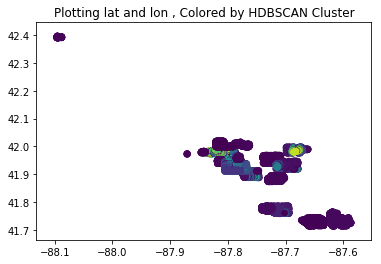

In [229]:
plt.title("Plotting lat and lon , Colored by HDBSCAN Cluster")
plt.scatter(spray['Longitude'], spray['Latitude'], c = h_cluster.labels_);

In [230]:
first_year = spray[spray['Year'] == 2011]
second_year = spray[spray['Year'] == 2013]
# exclude = df[df['Date'].year != year]

In [231]:
first_year.head()

,Latitude,Longitude,Year,Month,Day
0,42.391623,-88.089163,2011,8,29
1,42.391348,-88.089163,2011,8,29
2,42.391022,-88.089157,2011,8,29
3,42.390637,-88.089158,2011,8,29
4,42.390410,-88.088858,2011,8,29


In [199]:
spray_g = spray.groupby('Date', as_index=False)

In [212]:
spray_g.head(100)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
5,2011-08-29,6:57:48 PM,42.390395,-88.088315
6,2011-08-29,6:57:58 PM,42.390673,-88.088002
7,2011-08-29,6:58:08 PM,42.391027,-88.088002
8,2011-08-29,6:58:18 PM,42.391403,-88.088003
9,2011-08-29,6:58:28 PM,42.391718,-88.087995


In [156]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [157]:
spray[pd.isnull(spray).any(axis=1)]

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
1035,2011-09-07,NaN,41.986372,-87.794862
1036,2011-09-07,NaN,41.986228,-87.795582
1037,2011-09-07,NaN,41.984836,-87.793998
1038,2011-09-07,NaN,41.984836,-87.794670
1039,2011-09-07,NaN,41.984884,-87.795198


In [158]:
# dropping time columns as way to many values missing
spray = spray[pd.notnull(spray['Time'])]

In [159]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [160]:
# Combine Date and time : 
spray['datetime'] = pd.to_datetime(spray.Date + 'T' + spray.Time)

In [161]:
spray.head()

,Date,Time,Latitude,Longitude,datetime
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29 18:56:58
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29 18:57:08
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29 18:57:18
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29 18:57:28
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29 18:57:38


In [162]:
spray.dtypes

Date                 object
Time                 object
Latitude            float64
Longitude           float64
datetime     datetime64[ns]
dtype: object

In [163]:
dt = spray.datetime[1000] - spray.datetime.min()
dt

Timedelta('9 days 00:47:34')

In [164]:
print(dt.days)
print(dt.seconds)
print(dt.microseconds)

9
2854
0


In [165]:
dt.total_seconds

<bound method Timedelta.total_seconds of Timedelta('9 days 00:47:34')>

In [166]:
spray['timedelta'] = spray.datetime.apply(lambda x: (x - spray.datetime.min()).total_seconds())

In [167]:
spray.head()

,Date,Time,Latitude,Longitude,datetime,timedelta
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-08-29 18:56:58,0.0
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-08-29 18:57:08,10.0
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011-08-29 18:57:18,20.0
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011-08-29 18:57:28,30.0
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011-08-29 18:57:38,40.0


In [168]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14251 entries, 0 to 14834
Data columns (total 6 columns):
Date         14251 non-null object
Time         14251 non-null object
Latitude     14251 non-null float64
Longitude    14251 non-null float64
datetime     14251 non-null datetime64[ns]
timedelta    14251 non-null float64
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.4+ MB


In [169]:
# d
# spray['datetime'] = spray.datetime.apply(lambda x: (x - spray.datetime.min()).total_seconds())

In [170]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14251 entries, 0 to 14834
Data columns (total 6 columns):
Date         14251 non-null object
Time         14251 non-null object
Latitude     14251 non-null float64
Longitude    14251 non-null float64
datetime     14251 non-null datetime64[ns]
timedelta    14251 non-null float64
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.4+ MB


In [135]:
spray.drop(['Date', 'Time'], axis=1, inplace=True)

In [136]:
spray.head()

,Latitude,Longitude,datetime,timedelta
0,42.391623,-88.089163,0.0,0.0
1,42.391348,-88.089163,10.0,10.0
2,42.391022,-88.089157,20.0,20.0
3,42.390637,-88.089158,30.0,30.0
4,42.390410,-88.088858,40.0,40.0


In [137]:
spray.isnull().sum()

Latitude     0
Longitude    0
datetime     0
timedelta    0
dtype: int64

In [29]:
spray[pd.isnull(spray).any(axis=1)]

,Latitude,Longitude,datetime,timedelta
1030,41.987092,-87.794286,NaN,NaN
1031,41.987620,-87.794382,NaN,NaN
1032,41.988004,-87.794574,NaN,NaN
1033,41.988292,-87.795486,NaN,NaN
1034,41.988100,-87.796014,NaN,NaN
1035,41.986372,-87.794862,NaN,NaN
1036,41.986228,-87.795582,NaN,NaN
1037,41.984836,-87.793998,NaN,NaN
1038,41.984836,-87.794670,NaN,NaN
1039,41.984884,-87.795198,NaN,NaN


Text(0,0.5,'Latitude')

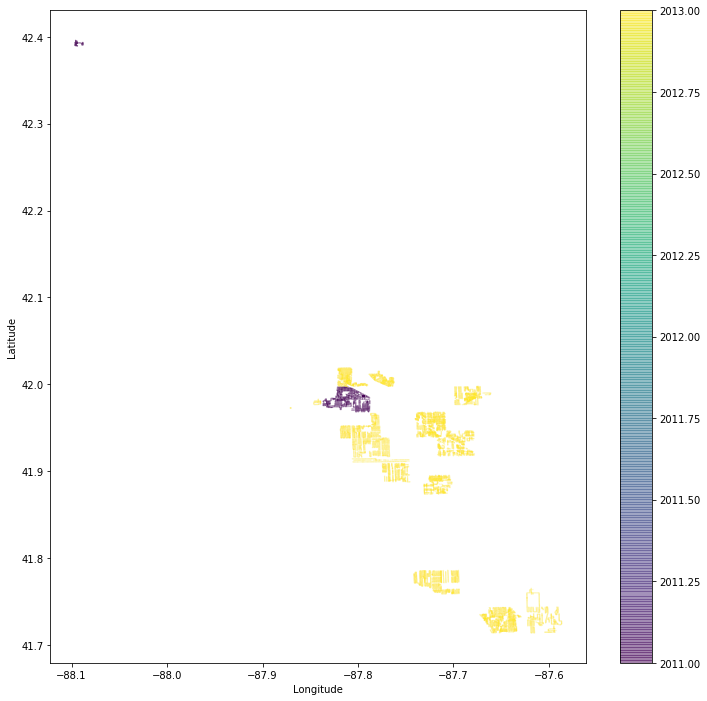

In [192]:
plt.figure(num=1, figsize=(12,12))
plt.scatter(spray.Longitude, spray.Latitude, marker='.', s=0.2,
            c = pd.to_datetime(spray.Date).map(lambda d: d.year),
           alpha = 0.5)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [144]:
# now we run HDBSCAN
h_cluster = hdbscan.HDBSCAN(min_cluster_size = 10,      # analogous to min_samples
                            gen_min_span_tree = True)

In [145]:
h_cluster.fit(spray)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=10, min_samples=None, p=None,
    prediction_data=False)

In [146]:
labels = h_cluster.labels_

In [147]:
print(h_cluster.labels_)

[0 0 0 ... 3 3 3]


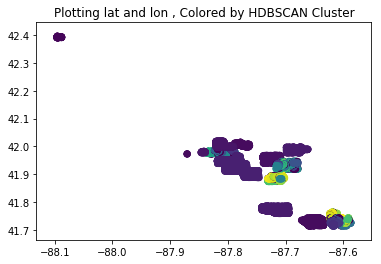

In [148]:
plt.title("Plotting lat and lon , Colored by HDBSCAN Cluster")
plt.scatter(spray['Longitude'], spray['Latitude'], c = h_cluster.labels_);

In [151]:
# for i in range(2,20):
#     cluster = hdbscan.HDBSCAN(min_cluster_size = i, gen_min_span_tree = True)
#     cluster.fit(spray)
#     labels = cluster.labels_
#     if len(set(cluster.labels_)) == 1 and cluster.labels_[i] != -1: 
#         print("Yes! Use min_samples = " + str(i))
#         break
#     else:
#         print("Not min_samples = " + str(i))

In [ ]:
# agreegate by vcluster, create new columns 
# 